# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    ind = (np.where(arr[:len(arr)-1] == 0)[0])
    
    return max(arr[(ind+1)])
    
    
arr = np.array([6, 2, 0, 3, 0, 81, 0, 5, 7, 0, 10])
print(max_element(arr))

81


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(X, v):
    X2 = np.abs(X - v)
    i = np.where((X2 == np.min(X2)))
    return X[i[0][0], i[1][0]]
    
X = np.arange(0,20).reshape((4, 5))
nearest_value(X, 8.77)

9

Четыре

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(X):
    newX = np.array([ (X[:,col] - X[:,col].mean()) / (X[:,col].max()) for col in range(X.shape[1]) ])
    newX = newX.transpose()
    return newX
np.random.seed(10)
X = np.random.randint(0, 10, size=(3,5))
print(X)
print(scale(X))


[[9 4 0 1 9]
 [0 1 8 9 0]
 [8 6 4 3 0]]
[[ 0.37037037  0.05555556 -0.5        -0.37037037  0.66666667]
 [-0.62962963 -0.44444444  0.5         0.51851852 -0.33333333]
 [ 0.25925926  0.38888889  0.         -0.14814815 -0.33333333]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
def get_stats(X):
    det = np.linalg.det(X)
    tr = np.trace(X)
    mx = np.max(X)
    mn = np.min(X)
    norm = np.linalg.norm(X, 'fro')
    eignvals = np.linalg.eig(X)
    Xinv = np.linalg.inv(X)
    return det, tr, mx, mn, norm, eignvals, Xinv
np.random.seed(10)
X = np.random.randint(0, 10, size=(3,3))
print(get_stats(X))
#лень красиво выводить

(693.0000000000006, 27, 9, 0, 18.027756377319946, (array([ 9., 11.,  7.]), array([[ 0.        ,  0.36514837,  0.53452248],
       [ 0.        ,  0.18257419, -0.26726124],
       [ 1.        ,  0.91287093,  0.80178373]])), array([[ 0.11688312, -0.05194805,  0.        ],
       [-0.01298701,  0.11688312,  0.        ],
       [-0.001443  , -0.0981241 ,  0.11111111]]))


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
np.random.seed(11)

m = np.empty(100)
for exp_num in range(100):
    A = np.random.normal(size=(10,10))
    B = np.random.normal(size=(10,10))
    A = A.dot(B)
    m[exp_num] = np.max(A)
print(np.average(m), np.quantile(m, 0.95))

8.35706903685284 11.87619436739272


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
air = pd.read_csv('2008.csv')
air

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [10]:
code_group = air.groupby(['CancellationCode'])['CancellationCode'].count()
code_group

CancellationCode
A    563
B    549
C    299
Name: CancellationCode, dtype: int64

Самая частая причина отмены рейса - carrier. Видимо, возникали проблемы с самолетом

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [11]:
dist = air['Distance']
print(np.average(dist), np.min(dist), np.max(dist))

724.5082571428571 31 4962


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [12]:
small_dist = air[air['Distance']==31][['Year', 'Month', 'DayofMonth', 'Origin', 'Dest']]
small_dist

,Year,Month,DayofMonth,Origin,Dest
1116,2008,12,30,WRG,PSG
6958,2008,12,26,WRG,PSG
17349,2008,8,18,PSG,WRG
27534,2008,3,11,PSG,WRG
46082,2008,8,9,WRG,PSG
48112,2008,2,28,PSG,WRG


In [13]:
air[(air['Origin']=='PSG') & (air['Dest']=='WRG')][['Year', 'Month', 'DayofMonth', 'Distance', 'Origin', 'Dest']]

,Year,Month,DayofMonth,Distance,Origin,Dest
17349,2008,8,18,31,PSG,WRG
27534,2008,3,11,31,PSG,WRG
48112,2008,2,28,31,PSG,WRG


In [14]:
air[(air['Origin']=='WRG') & (air['Dest']=='PSG')][['Year', 'Month', 'DayofMonth', 'Distance', 'Origin', 'Dest']]

,Year,Month,DayofMonth,Distance,Origin,Dest
1116,2008,12,30,31,WRG,PSG
6958,2008,12,26,31,WRG,PSG
46082,2008,8,9,31,WRG,PSG


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [15]:
origin_group = air.groupby(['Origin'])['Origin'].count()
#origin_group
origin_group[origin_group==max(origin_group)]

Origin
ATL    4134
Name: Origin, dtype: int64

**Город - Атланта**

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [16]:
time_filt = air[['Origin', 'AirTime']]
time_group = time_filt.groupby(['Origin'])['AirTime'].mean()
time_group[time_group==max(time_group)]

Origin
SJU    205.2
Name: AirTime, dtype: float64

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [17]:
air['FlightCount'] = air.groupby('Origin')['Origin'].transform('count')
delPorts = air[(air['FlightCount']>1000)&(air['DepDelay']>0)][['Origin', 'DepDelay', 'FlightCount']]
delPorts['DelCount'] = delPorts.groupby('Origin')['Origin'].transform('count')
delPorts['DelRatio']  = delPorts['DelCount'] / delPorts['FlightCount']
delPorts[delPorts['DelRatio']==max(delPorts['DelRatio'])]

,Origin,DepDelay,FlightCount,DelCount,DelRatio
79,EWR,11.0,1389,710,0.511159
99,EWR,65.0,1389,710,0.511159
105,EWR,12.0,1389,710,0.511159
192,EWR,98.0,1389,710,0.511159
231,EWR,101.0,1389,710,0.511159
...,...,...,...,...,...
69465,EWR,31.0,1389,710,0.511159
69597,EWR,415.0,1389,710,0.511159
69612,EWR,103.0,1389,710,0.511159
69839,EWR,16.0,1389,710,0.511159


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [18]:
print('всего пропущенных элементов:', air.isna().sum().sum())

всего пропущенных элементов: 355215


In [19]:
np.count_nonzero(air.astype(bool).sum(axis=1))

70000

In [20]:
air.isna().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
FlightCount              0
dtype: int64

**Все объекты имеют хотя бы один пропуск, 16 признаков имеют хотя бы одно пропущенное значение**

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [21]:
air_copy = air.copy()
pd.set_option('display.max_columns', None)

**1399 объектов имеют пропуск в целевой переменной, и это без учета объектов, в которых она принимает нулевое значение**

In [22]:
air_copy[air_copy['DepDelay'].isna()]
#air_copy[air_copy['DepDelay'].isna() & air_copy['Cancelled'] == 1]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightCount
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,NaN,NaN,155.0,NaN,NaN,NaN,DFW,MIA,1121,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,2793
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,N683BR,NaN,100.0,NaN,NaN,NaN,ATL,CAK,528,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,4134
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,N990AT,NaN,85.0,NaN,NaN,NaN,BOS,BWI,370,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,1162
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,N526US,NaN,98.0,NaN,NaN,NaN,MDW,MSP,349,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,881
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,NaN,NaN,87.0,NaN,NaN,NaN,DSM,ORD,299,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,NaN,NaN,75.0,NaN,NaN,NaN,DFW,CRP,354,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN,2793
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,NaN,NaN,52.0,NaN,NaN,NaN,ACT,DFW,89,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,24
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,N330NW,NaN,101.0,NaN,NaN,NaN,MEM,MKE,556,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,818
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,N635AS,NaN,102.0,NaN,NaN,NaN,MYR,ATL,317,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,63


**DepDelay является нуллом, если полет был отменен. Так как мы не предсказываем отмену полета, можно исключить этот признак из рассмотрения. Также нужно убрать Cancellation Code, так как он не равен нуллу только когда полет был отменен.**

In [23]:
air_copy = air_copy.drop(columns=['Cancelled', 'CancellationCode'])

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [24]:
#air[['DepTime','CRSDepTime','ArrTime','CRSArrTime']]
air_copy['DepTime_Hour']=air_copy['DepTime']//100
air_copy['DepTime_Minute']=air_copy['DepTime']%100

air_copy['CRSDepTime_Hour']=air_copy['CRSDepTime']//100
air_copy['CRSDepTime_Minute']=air_copy['CRSDepTime']%100

air_copy['ArrTime_Hour']=air_copy['ArrTime']//100
air_copy['ArrTime_Minute']=air_copy['ArrTime']%100

air_copy['CRSArrTime_Hour']=air_copy['CRSArrTime']//100
air_copy['CRSArrTime_Minute']=air_copy['CRSArrTime']%100

air_copy = air_copy.drop(columns=['DepTime','CRSDepTime','ArrTime','CRSArrTime'])

In [25]:
air_copy.head(1)

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightCount,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN,881,21.0,11.0,20,55,23.0,8.0,23,0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

**Я думаю, что также нужно исключить признаки Reason_Name_Delay, потому что если уж у нас произошла задержка рейса, то одна из этих фич точно будет ненулевой. И тут причина и следствие будет путаться, мы начнем предсказывать задержку полета на основе того, что задержка полета из-за плохой погоды четыре минуты заняла. На самом деле для более подробного исследования можно было бы в конце для всех этих фич отдельно проделать ту же работу. Может, окажется, что по воскресеньям всегда Security Delay происходит**

**Также есть смысл исключить FlightNum, так как он везде уникальный и не оказывает влияния на целевую переменную. На самом деле можно увлечься нумерологией и посмотреть на нечетные номера, может, рейсы с нечетными номерами постоянно откладываются.**

**Не понимаю, каким боком такси может влиять на отправление самолета, поэтому признаки с такси тоже исключу**

In [26]:
air_copy = air_copy.drop(columns=['TailNum','Year', 'FlightNum', 'CarrierDelay',
                                 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])

In [27]:
air_copy = air_copy.drop(columns=['TaxiIn','TaxiOut',])

In [28]:
air_copy

,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Diverted,FlightCount,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,0,881,21.0,11.0,20,55,23.0,8.0,23,0
1,6,4,3,XE,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,0,1795,14.0,26.0,14,10,17.0,30.0,17,28
2,8,3,7,WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,0,881,11.0,43.0,11,45,15.0,1.0,15,20
3,1,23,3,OO,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,0,1325,11.0,41.0,11,44,13.0,23.0,13,35
4,5,4,7,WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,0,1793,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,5,12,1,DL,128.0,129.0,86.0,-12.0,-11.0,ORD,ATL,606,0,3550,18.0,29.0,18,40,21.0,37.0,21,49
69996,5,11,7,OO,47.0,49.0,30.0,22.0,24.0,ORD,GRR,137,0,3550,11.0,49.0,11,25,13.0,36.0,13,14
69997,9,24,3,YV,80.0,80.0,63.0,0.0,0.0,DAY,IAD,368,0,156,10.0,12.0,10,12,11.0,32.0,11,32
69998,2,18,1,NW,234.0,219.0,192.0,21.0,6.0,RSW,MSP,1416,0,257,19.0,6.0,19,0,22.0,0.0,21,39


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

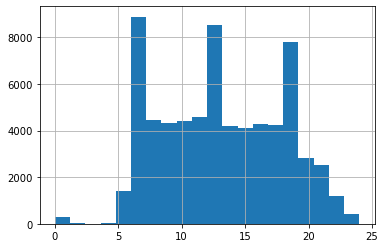

In [29]:
air_copy['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

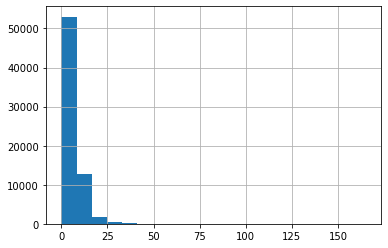

In [30]:
air['TaxiIn'].hist(bins=20)

<AxesSubplot:>

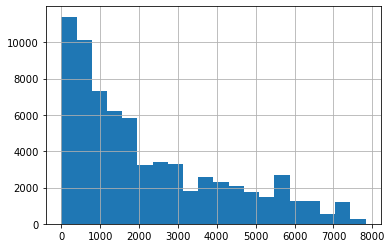

In [31]:
air['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

**Данные отмасштабированы очень по-разному, из-за этого непонятно, как их потом сравнивать**

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
air_copy

,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Diverted,FlightCount,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,0,881,21.0,11.0,20,55,23.0,8.0,23,0
1,6,4,3,XE,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,0,1795,14.0,26.0,14,10,17.0,30.0,17,28
2,8,3,7,WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,0,881,11.0,43.0,11,45,15.0,1.0,15,20
3,1,23,3,OO,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,0,1325,11.0,41.0,11,44,13.0,23.0,13,35
4,5,4,7,WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,0,1793,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,5,12,1,DL,128.0,129.0,86.0,-12.0,-11.0,ORD,ATL,606,0,3550,18.0,29.0,18,40,21.0,37.0,21,49
69996,5,11,7,OO,47.0,49.0,30.0,22.0,24.0,ORD,GRR,137,0,3550,11.0,49.0,11,25,13.0,36.0,13,14
69997,9,24,3,YV,80.0,80.0,63.0,0.0,0.0,DAY,IAD,368,0,156,10.0,12.0,10,12,11.0,32.0,11,32
69998,2,18,1,NW,234.0,219.0,192.0,21.0,6.0,RSW,MSP,1416,0,257,19.0,6.0,19,0,22.0,0.0,21,39


In [34]:
def transform_data(data):
    dataNum = data.select_dtypes(include=np.number).fillna(0)
    dataStr = data.select_dtypes(exclude=np.number).fillna('nan')
    
    dataNum = pd.DataFrame(StandardScaler().fit_transform(dataNum), columns=dataNum.columns)
    dataStr = pd.get_dummies(dataStr)
    
    return pd.concat([dataNum, dataStr], axis=1)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [35]:
air_copy_nice = transform_data(air_copy)
air_copy_nice

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Diverted,FlightCount,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,Dest_ABE,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,Dest_AMA,Dest_ANC,Dest_ASE

**Получилось 635 признаков**

**Вынесем DepDelay в отдельный вектор после всех преобразований**

In [36]:
dep_delay = air_copy_nice['DepDelay']
air_copy_nice = air_copy_nice.loc[:, air_copy_nice.columns!='DepDelay']
dep_delay

0        0.181158
1        0.181158
2       -0.341343
3       -0.370371
4       -0.428427
           ...   
69995   -0.602594
69996    0.413381
69997   -0.283287
69998   -0.109120
69999   -0.312315
Name: DepDelay, Length: 70000, dtype: float64

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
air_train, air_test, delay_train, delay_test = train_test_split(
    air_copy_nice, dep_delay, test_size=0.3, random_state=1)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [40]:
lr = LinearRegression().fit(air_train[0:1000], delay_train[0:1000])

print(mean_squared_error(delay_train[0:1000], lr.predict(air_train[0:1000])))
print(lr.score(air_train[0:1000], delay_train[0:1000]))
print(mean_squared_error(delay_test, lr.predict(air_test)))
print(lr.score(air_test, delay_test))

0.03365150234146447
0.9642871517380627
2.014986257972588e+19
-2.1655105486885122e+19


**Итак, видим, что на выборке, на которой мы обучили свою модель, все работает.  когда мы переходим на тестовую выборку, все не работает (((( даже не знаю, что сказать...**

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (1 балл)** Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [41]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [42]:
ridge = Ridge().fit(air_train, delay_train)
lasso = Lasso().fit(air_train, delay_train)

In [43]:
ridge.coef_

array([ 7.72964477e-03, -2.50205041e-04,  3.25737344e-03, -1.80076893e+00,
        1.12159095e+00,  1.21443879e+00,  1.02230725e+00, -5.74982488e-01,
       -3.30755671e-02,  2.12047801e-02,  3.06617002e-01,  3.17438715e-02,
       -2.36960810e-01, -1.87444977e-02,  2.70249479e-02,  1.44780410e-02,
       -4.39627381e-02, -3.28150181e-03,  5.75303269e-02, -1.17578866e-02,
       -1.72402140e-02, -3.12444706e-02, -1.52372395e-02,  1.25018864e-02,
        2.56507890e-02,  1.78401609e-02, -2.41060483e-02, -1.83301331e-02,
       -1.64794255e-02, -1.38587506e-02,  1.49453007e-02, -6.19053809e-04,
       -1.18661666e-03,  1.00366709e-02,  1.50265428e-02,  4.51800538e-04,
       -7.25765051e-03,  3.33401043e-03, -1.43164825e-01,  3.08336942e-02,
        7.09405399e-02, -6.46284553e-02,  8.69336149e-03,  9.64100680e-03,
        6.30755654e-02, -2.63634293e-02,  1.84392816e-01,  1.58516551e-01,
       -8.93353375e-02, -2.51568951e-03,  0.00000000e+00, -1.34700055e-01,
       -5.41461896e-03,  

In [44]:
print(len(ridge.coef_[np.abs(ridge.coef_)<0.1]), len(lasso.coef_[np.abs(lasso.coef_)<0.00000001]))

400 634


**Лассо у меня вообще не работает, понятия не имею, почему. Вроде бы ридж нормально работает**

In [45]:
coefs = np.logspace(-3, 3, 10)
nonzeros = []
for alpha in coefs:
    ridge = Ridge(alpha=alpha).fit(air_train, delay_train)
    nonzeros.append(len(ridge.coef_[ridge.coef_!=0]))

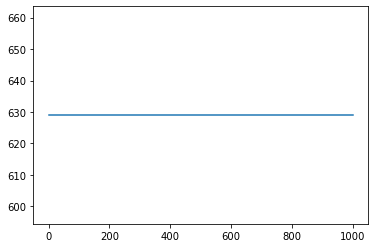

In [46]:
plt.plot(coefs, nonzeros)
plt.show()

**Видим, что нулевых элементов вообще нет**

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [47]:
print(mean_squared_error(delay_test, ridge.predict(air_test)))
print(mean_absolute_error(delay_test, ridge.predict(air_test)))
print(ridge.score(air_test, delay_test))

0.0777729031867797
0.17843689288137574
0.9164172750128041


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [49]:
train_small, delay_small = air_train[0:1000], delay_train[0:1000]
coefs = np.logspace(-3, 3, 10)

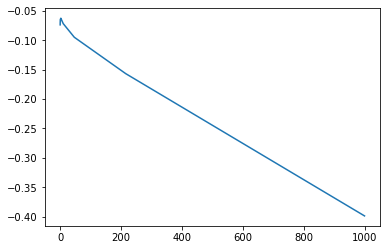

In [50]:
Ridge_reg = GridSearchCV(Ridge(), {"alpha": coefs}, scoring='neg_mean_squared_error',cv=5)
Ridge_reg.fit(train_small, delay_small)
plt.plot(coefs, Ridge_reg.cv_results_['mean_test_score'])

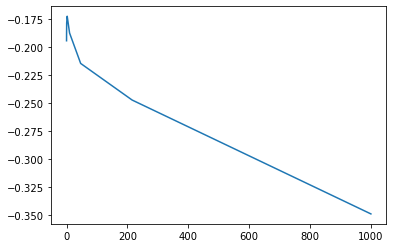

In [51]:
Ridge_reg = GridSearchCV(Ridge(), {"alpha": coefs}, scoring='neg_mean_absolute_error',cv=5)
Ridge_reg.fit(train_small, delay_small)
plt.plot(coefs, Ridge_reg.cv_results_['mean_test_score'])

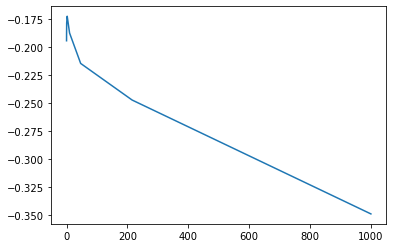

In [52]:
Lasso_reg = GridSearchCV(Lasso(), {"alpha": coefs}, scoring='neg_mean_absolute_error',cv=5)
Ridge_reg.fit(train_small, delay_small)
plt.plot(coefs, Ridge_reg.cv_results_['mean_test_score'])

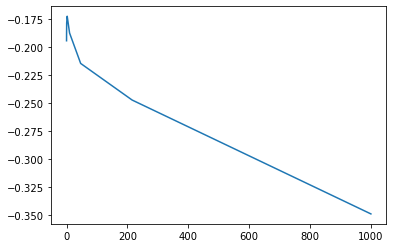

In [53]:
Lasso_reg = GridSearchCV(Lasso(), {"alpha": coefs}, scoring='neg_mean_squared_error',cv=5)
Ridge_reg.fit(train_small, delay_small)
plt.plot(coefs, Ridge_reg.cv_results_['mean_test_score'])

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [57]:
from sklearn.model_selection import cross_val_predict
import sklearn.linear_model as lm

(array([3.0218e+04, 1.5845e+04, 1.9470e+03, 6.1100e+02, 2.2700e+02,
        7.9000e+01, 3.6000e+01, 1.7000e+01, 8.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.61716003, -0.1297967 ,  1.35756662,  2.84492995,  4.33229328,
         5.8196566 ,  7.30701993,  8.79438326, 10.28174659, 11.76910991,
        13.25647324, 14.74383657, 16.2311999 , 17.71856322, 19.20592655,
        20.69328988, 22.1806532 , 23.66801653, 25.15537986, 26.64274319,
        28.13010651]),
 <BarContainer object of 20 artists>)

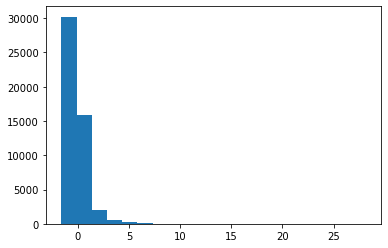

In [60]:
lasso = lm.Lasso(alpha=0.018)
y_pred = cross_val_predict(lasso, air_train, delay_train, cv=5)
plt.hist(y_pred, bins=20)